In [1]:
# Imports needed for the script
import numpy as np
import pandas as pd
import re
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont


## Alone: 1, Not Alnoe: 0 (Alone means with a family size of 1)
## Female: 0, Male: 1
## Has cabin:0, do not have cabin:1

In [2]:
train = pd.read_csv('clean_train.csv')

In [3]:
# Showing overview of the train dataset
train = train[['Survived','Sex','IsAlone','Has_Cabin']]

In [4]:
train.head(3)

,Survived,Sex,IsAlone,Has_Cabin
0,0,1,0,0
1,1,0,0,1
2,1,0,1,0


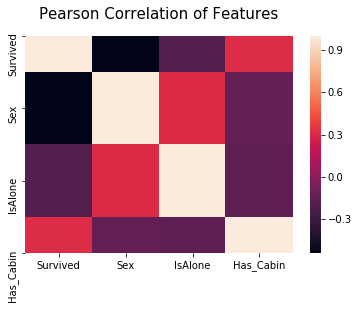

In [19]:
colormap = plt.cm.viridis
plt.figure()
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr())

In [20]:
train.astype(float).corr()

,Survived,Sex,IsAlone,Has_Cabin
Survived,1.000000,-0.543351,-0.203367,0.316912
Sex,-0.543351,1.000000,0.303646,-0.140391
IsAlone,-0.203367,0.303646,1.000000,-0.158029
Has_Cabin,0.316912,-0.140391,-0.158029,1.000000


## By looking at the correlation heatmap and correlation table, we might assume that sex should be a better indicator as decision nodes than IsAlone and Has_Cabin

In [5]:
cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = len(list(train))-1
depth_range = range(1, max_attributes + 1)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth, criterion = 'entropy')
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(train):
        f_train = train.loc[train_fold] # Extract train data with cv indices
        f_valid = train.loc[valid_fold] # Extract valid data with cv indices

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.786729
         2          0.786729
         3          0.777778


In [10]:
y_train = train['Survived']
x_train = train.drop(['Survived'], axis=1).values 
decision_tree_depth1 = tree.DecisionTreeClassifier(max_depth = 1, criterion = 'entropy')
decision_tree_depth1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

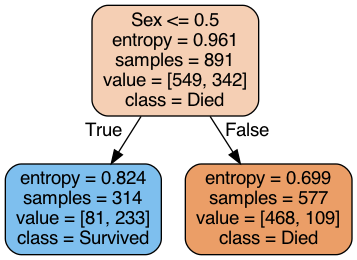

In [11]:
# Export our trained model as a .dot file
with open("tree0.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree_depth1,
                              out_file=f,
                              max_depth = 1,
                              impurity = True,
                              feature_names = list(train.drop(['Survived'], axis=1)),
                              class_names = ['Died', 'Survived'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree0.dot','-o','tree0.png'])

# Annotating chart with PIL
img = Image.open("tree0.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")

In [6]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
decision_tree_depth2 = tree.DecisionTreeClassifier(max_depth = 2, criterion = 'entropy')
decision_tree_depth2.fit(x_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

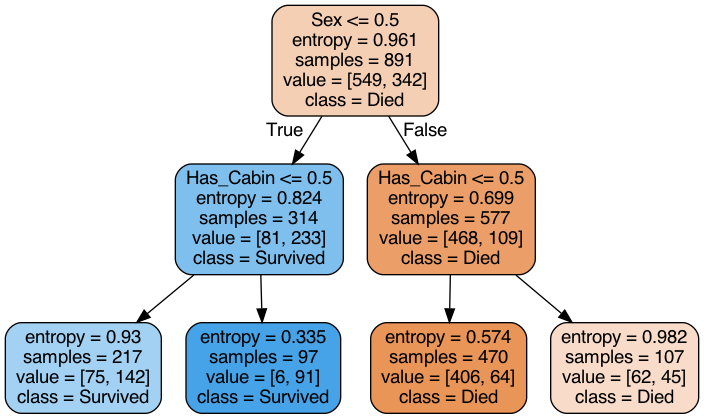

In [7]:
# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree_depth2,
                              out_file=f,
                              max_depth = 2,
                              impurity = True,
                              feature_names = list(train.drop(['Survived'], axis=1)),
                              class_names = ['Died', 'Survived'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")

In [8]:
decision_tree_depth3 = tree.DecisionTreeClassifier(max_depth = 3, criterion = 'entropy')
decision_tree_depth3.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

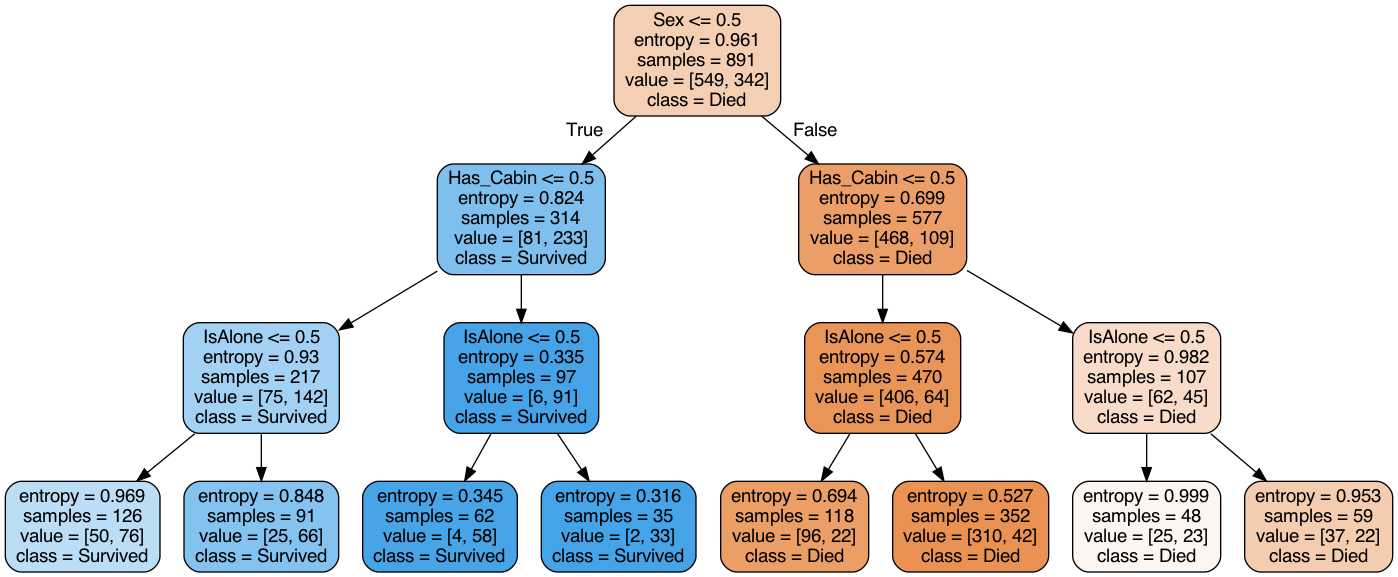

In [9]:
# Export our trained model as a .dot file
with open("tree2.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree_depth3,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(train.drop(['Survived'], axis=1)),
                              class_names = ['Died', 'Survived'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree2.dot','-o','tree2.png'])

# Annotating chart with PIL
img = Image.open("tree2.png")
draw = ImageDraw.Draw(img)
img.save('sample-out1.png')
PImage("sample-out1.png")

# Summary

In the previous cross-validation cell, I did a ten fold cross-validation to find an optimal maximum depth of the decision Tree, it turned out that with one and two features, we can have the best tree according to accuracy. By looking into the graph we will find that the decision node when using only one feature is about sex. With two features, it chooses sex and Has_Cabin. For three features model, the IsAlone feature is finally included.

In the results, we find that in the left subtree for all three trees, the leaf node is in survived class, right subtree another way around, indicating that sex relates most to the chance of surviving. This perfectly corresonds with the cross validation result which suggests that using sex as the only feature will generate the best performance, adding the cabin feature does not increase the accuracy, adding IsAlone even decreases the accuracy by a little.

The reason behind a higher survival rate of females corresponds the policy that when emergency happens, ladies and juveniles are the first to get aids. The data shows that the actual conduction of such policy was pretty good. This can relate to a question that when facing life risks, will people still stick with the moral standards? From the data and the model, we may want to conclude that if not the case for the entire population, yet at least on that particular ship, people adhered to their ethics at the final moment.

The IsAlone feature indicates whether the person is with someone else, intuitively we may think that people with a family have a larger chance of survival, but it turned out not so related.

People with a cabin may suggest he/she is in a higer class, which intuitively may result in higher chances of survival. The data suggests that might not be true, whether having a cabin did not influence so much.

Possible research potential in social science: starting from the conclusion draw on the difference of chance of survival between genders, a reasearch on people's adherence to moral standards in life risk situations can be started.